# 275 Bird Species also see 73 Sports Dataset

今までのPyTorchの学習を活かして、実際にデータを分類してみる。

今回用いるデータは、Kaggleに上がっていた、２７５種類の鳥の分類問題である。

詳細は、https://www.kaggle.com/gpiosenka/100-bird-species

## ライブラリのインポート

In [1]:
import time

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms

## デバイスの確認

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## データの前処理

7/1

過学習対策として、データ拡張を行う。

そのために、トレーニングデータとテストデータ別々のtransformを作成する。

In [3]:
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

In [4]:
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

In [5]:
train_dataset = datasets.ImageFolder('./archive/train', transform=train_transform)
validation_dataset = datasets.ImageFolder('./archive/test', transform=test_transform)

In [6]:
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=8, shuffle=False)

In [7]:
data_iter = iter(train_dataloader)
imgs, labels = data_iter.next()
labels

tensor([201,  26, 262,  44,  13, 226, 151, 130])

In [8]:
imgs.size()

torch.Size([8, 3, 224, 224])

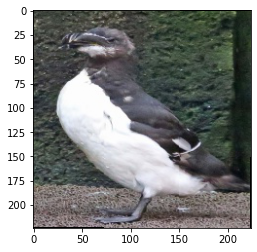

In [9]:
img = imgs[0]
img_permute = img.permute(1, 2, 0)
img_permute = 0.5 * img_permute + 0.5
img_permute = np.clip(img_permute, 0, 1)
plt.imshow(img_permute)

## モデルの構築

7/1

vggに変更して、学習できるか確認する。

7/2

ResNetを用いてみる。

7/3

ResNetを一から構築する

In [10]:
resnet = models.resnet34()

In [11]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [12]:
# for param in resnet.parameters():
#     param.requires_grad = False

In [13]:
resnet.fc = nn.Linear(512, 275)

In [14]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [15]:
resnet.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## 学習・検証
7/1

lrを小さめに変更。

epochの数も増やした。

7/2

学習済みresnetを用いるので、少しエポック数を下げる

過学習が発生したため、正則化を行う。

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.parameters(), lr=0.0001, weight_decay=5e-3)

time関数を導入し、時間を図るようにする。

In [17]:
t1 = time.time()

batch_multiplier = 8

num_epochs = 30
losses = []
accs = []
val_losses = []
val_accs = []
for epoch in range(num_epochs):
    running_loss = 0.0
    running_acc = 0.0
    count = 0
    for imgs, labels in train_dataloader:
        if count == 0:
            optimizer.step()
            optimizer.zero_grad()
            count = batch_multiplier
            
        imgs = imgs.to(device)
        labels = labels.to(device)
        output = resnet(imgs)
        loss = criterion(output, labels) / batch_multiplier
        loss.backward()
        count -= 1
        running_loss += loss.item()
        pred = torch.argmax(output, dim=1)
        running_acc += torch.mean(pred.eq(labels).float())
        
    running_loss /= len(train_dataloader)
    running_acc /= len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc)

    val_running_loss = 0.0
    val_running_acc = 0.0
    for val_imgs, val_labels in validation_dataloader:
        val_imgs = val_imgs.to(device)
        val_labels = val_labels.to(device)
        val_output = resnet(val_imgs)
        val_loss = criterion(val_output, val_labels)
        val_running_loss += val_loss.item()
        val_pred = torch.argmax(val_output, dim=1)
        val_running_acc +=torch.mean(val_pred.eq(val_labels).float())
    val_running_loss /= len(validation_dataloader)
    val_running_acc /= len(validation_dataloader)
    val_losses.append(val_running_loss)
    val_accs.append(val_running_acc)
    print('epoch: {}, loss: {}, acc: {},\t val_loss: {}, val_acc: {}'.format(
        epoch, running_loss, running_acc, val_running_loss, val_running_acc))

t2 = time.time()
elapsed_time = t2-t1
print(f"経過時間：{elapsed_time}")

C:\Users\lear0\anaconda3\envs\pytorch_env\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch: 0, loss: 0.5770410181387874, acc: 0.08570412546396255,	 val_loss: 5.043022760125094, val_acc: 0.04370846971869469
epoch: 1, loss: 0.4050050226199726, acc: 0.29198840260505676,	 val_loss: 4.641694450101187, val_acc: 0.11513704806566238
epoch: 2, loss: 0.3104630216662415, acc: 0.4472922086715698,	 val_loss: 4.325165594733039, val_acc: 0.1710963398218155
epoch: 3, loss: 0.2539426390292852, acc: 0.5447571873664856,	 val_loss: 4.130229682423348, val_acc: 0.1934177726507187
epoch: 4, loss: 0.21615307119135038, acc: 0.6125279664993286,	 val_loss: 3.9676478657611582, val_acc: 0.21034051477909088
epoch: 5, loss: 0.19160263383716764, acc: 0.6597236394882202,	 val_loss: 3.892206689646078, val_acc: 0.2327657788991928
epoch: 6, loss: 0.17510128801045463, acc: 0.6903068423271179,	 val_loss: 3.788469363090604, val_acc: 0.24595098197460175
epoch: 7, loss: 0.16231405176600833, acc: 0.7176386713981628,	 val_loss: 3.7291502148606055, val_acc: 0.2597591280937195
epoch: 8, loss: 0.1520044943773875, 

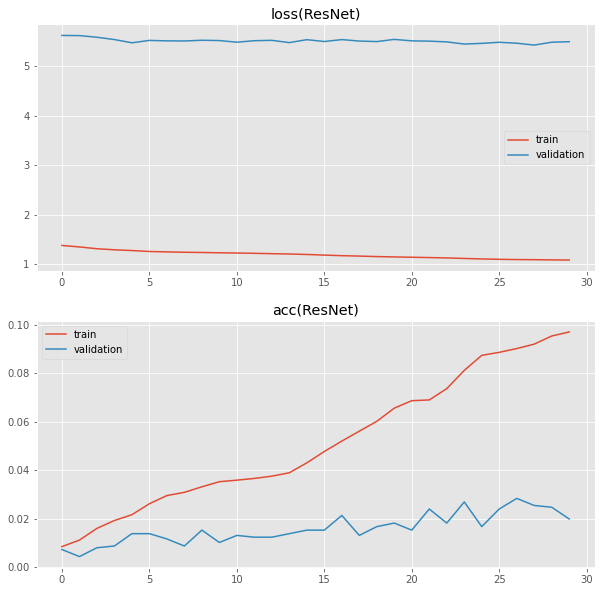

In [18]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.title('loss(ResNet)')
plt.plot(losses, label='train')
plt.plot(val_losses, label='validation')
plt.legend()

plt.subplot(2, 1, 2)
plt.title('acc(ResNet)')
plt.plot(accs, label='train')
plt.plot(val_accs, label='validation')
plt.legend()

## まとめ
### 6/30
結果については、過学習が起こっていることが確認できる。そのため、次回は

- データ拡張を行う。
- 正則化を行う。


また、今回遭遇したトラブルは、

- ミニバッチのサイズを大きくすると、GPUがメモリ不足を起こす。
- ミニバッチのサイズと学習率の両方の考慮が必要である。

これらに気を付けて、これからも学習を続ける。

## 7/1
このモデルだと学習が厳しそうなので、次の実装でVGGを用いてみる

VGGを用いた実装がなかなかひどい結果になった。

これは、もっといろいろなことを試す必要がありそう。

明日に向けて

- 学習率をもっと下げてもいいかも
- optimizerのgammaの値を0.75なんかでもいいのかも
- 初期値のパラメータを用いて1から構築してもいいかも（時間かかるし、バッチサイズには気をつけて８でいきたい）


## 7/2

VGGを用いて構成するといい精度を獲得することができた。

学習済みのResNetを用いると過学習が起きていることが確認できた。

正則化を行い、もう一度実装を行う。

ミニバッチのサイズを変更することによってある程度良い精度を獲得することができた。

最後にＲｅｓＮｅｔを１から構築してみる。

## 7/4 

ハイパーパラメータの調整は、本当に難しいことを実感した。

今回のデータを用いての実装は1回終了して、新しいことにチャレンジをする。